<img align="left" src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/CC_BY.png"><br />

Created by [Nathan Kelber](http://nkelber.com) and Ted Lawless for [JSTOR Labs](https://labs.jstor.org/) under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/)<br />
For questions/comments/improvements, email nathan.kelber@ithaka.org.<br />
____
**Exploring Word Frequencies**

**Description:**
This notebook finds the word frequencies for a dataset. Optionally, this notebook can take the following inputs:

* Filtering based on a pre-processed ID list
* Filtering based on a stop words list

**Use Case:** For Researchers (Mostly code without explanation, not ideal for learners)

[Take me to the **Learning Version** of this notebook ->](./exploring-word-frequencies.ipynb)

**Difficulty:** Intermediate

**Completion time:** 5-10 minutes

**Knowledge Required:** 
* Python Basics ([Start Python Basics I](./python-basics-1.ipynb))

**Knowledge Recommended:**

* [Working with Dataset Files](./working-with-dataset-files.ipynb)
* [Pandas I](./pandas-1.ipynb)
* [Counter Objects](./counter-objects.ipynb)
* [Creating a Stopwords List](./creating-stopwords-list.ipynb)

**Data Format:** [JSON Lines (.jsonl)](https://docs.tdm-pilot.org/key-terms/#jsonl)

**Libraries Used:**
* **[tdm_client](https://docs.tdm-pilot.org/key-terms/#tdm-client)** to collect, unzip, and read our dataset
* **[NLTK](https://docs.tdm-pilot.org/key-terms/#nltk)** to help [clean](https://docs.tdm-pilot.org/key-terms/#clean-data) up our dataset
* [Counter](https://docs.tdm-pilot.org/key-terms/#python-counter) from **Collections** to help sum up our word frequencies

**Research Pipeline:**

1. Build a dataset
2. Create a "Pre-Processing CSV" with [Exploring Metadata](./exploring-metadata.ipynb) (Optional)
3. Create a "Custom Stopwords List" with [Creating a Stopwords List](./creating-stopwords-list.ipynb) (Optional)
4. Create the word frequencies analysis with this notebook
___

# Import Raw Dataset

In [ ]:
# Creating a variable `dataset_id` to hold our dataset ID
# The default dataset is Shakespeare Quarterly, 1950-present
dataset_id = "ea7669d2-bdf0-d62f-7904-36ba6ddadd9b"

# Pull in the dataset that matches `dataset_id`
# in the form of a gzipped JSON lines file.
import tdm_client
dataset_file = tdm_client.get_dataset(dataset_id)

INFO:root:Dataset file ea7669d2-bdf0-d62f-7904-36ba6ddadd9b.jsonl.gz exists. Not re-downloading.


# Load Pre-Processing Filter (Optional)
If you completed pre-processing with the "Exploring Metadata and Pre-processing" notebook, you can use your CSV file of dataset IDs to automatically filter the dataset. 

In [ ]:
# Import a pre-processed CSV file of filtered dataset IDs.
# If you do not have a pre-processed CSV file, the analysis
# will run on the full dataset and may take longer to complete.
import pandas as pd
import os

pre_processed_file_name = f'data/pre-processed_{dataset_id}.csv'

if os.path.exists(pre_processed_file_name):
    df = pd.read_csv(pre_processed_file_name)
    filtered_id_list = df["id"].tolist()
    use_filtered_list = True
    print('Pre-Processed CSV found. Successfully read in ' + str(len(df)) + ' documents.')
else: 
    use_filtered_list = False
    print('No pre-processed CSV file found. Full dataset will be used.')

No pre-processed CSV file found. Full dataset will be used.


# Load Stop Words List (Optional)
The default stop words list is NLTK. You can also create a stopwords CSV with the "Creating Stop Words" notebook.

In [ ]:
# Load a custom data/stop_words.csv if available
# Otherwise, load the nltk stopwords list in English

# Create an empty Python list to hold the stopwords
stop_words = []

# The filename of the custom data/stop_words.csv file
stopwords_list_filename = 'data/stop_words.csv'
  
if os.path.exists(stopwords_list_filename):
    import csv
    with open(stopwords_list_filename, 'r') as f:
        stop_words = list(csv.reader(f))[0]
    print('Custom stopwords list loaded from CSV')
else:
    from nltk.corpus import stopwords
    stop_words = stopwords.words('english')
    print('NLTK stop words list loaded')

NLTK stop words list loaded


# Find Word Frequencies

In [ ]:
from collections import Counter
word_str = ''

# Hold our word counts in a Counter Object
transformed_word_frequency = Counter()

# Apply filter list
for document in tdm_client.dataset_reader(dataset_file):
    if use_filtered_list is True:
        document_id = document['id']
        # Skip documents not in our filtered_id_list
        if document_id not in filtered_id_list:
            continue
    unigrams = document.get("unigramCount", [])
    for gram, count in unigrams.items():
        clean_gram = gram.lower() # Lowercase the unigram
        if clean_gram in stop_words: # Remove unigrams from stop words
            continue
        if not clean_gram.isalpha(): # Remove unigrams that are not alphanumeric
            continue
        transformed_word_frequency[clean_gram] += count
        word_str += " " + clean_gram  #Added: string of all words
        

In [ ]:
#Added: To list first three pairs in transformed_word_frequency
import itertools          
# Initialize limit  
N = 3
# Using islice() + items()  
# Get first N items in dictionary  
out = dict(itertools.islice(transformed_word_frequency.items(), N))    
# printing result   
print("Dictionary limited by K is : " + str(out))  

Dictionary limited by K is : {'comments': 596, 'discussion': 1546, 'comment': 273}


In [ ]:
#Added: List first 100 character of the all-words list
print(word_str[:100])

 comments discussion comment olivier blanchard great see emerging gold standard empirical painstakin


In [ ]:
#Install matplotlib for word plot cloud
pip install matplotlib

In [ ]:
#Install matplotlib for word plot cloud
pip install wordcloud

In [ ]:
#Install matplotlib for word plot cloud
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

# Display Top 100 Words

In [ ]:
# Print the most common processed unigrams and their counts
for gram, count in transformed_word_frequency.most_common(100):
    print(gram.ljust(20), count)

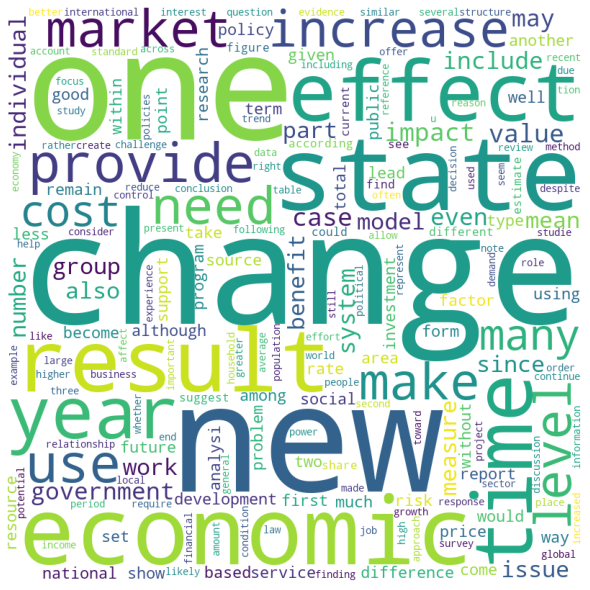

In [ ]:
#Added: plot word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(word_str) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
#Convert dictionary to datafrom of word frequency
word_df = pd.DataFrame.from_dict(transformed_word_frequency, orient='index').reset_index()
word_df = word_df.rename(columns={"index": "word", 0: "count"})

In [ ]:
#Save word frequency table to csv file
word_df.to_csv('data/word_freq.csv')